In [3]:
!pip install openpyxl



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

# Load your Excel file
df = pd.read_excel("sales_data.xlsx")

# Show the first few rows
df.head()


,Date,Region,Product,Units Sold,Unit Price,Total Sales
0,2023-01-31,North,Laptop,120,1000,120000
1,2023-02-28,South,Tablet,85,500,42500
2,2023-03-31,East,Smartphone,210,700,147000
3,2023-04-30,West,Laptop,60,1000,60000
4,2023-05-31,North,Tablet,140,500,70000


In [5]:
# Check number of rows and columns
df.shape

# Check for missing values
df.isnull().sum()

# Data types
df.dtypes


Date           datetime64[ns]
Region                 object
Product                object
Units Sold              int64
Unit Price              int64
Total Sales             int64
dtype: object

In [6]:
# Calculate total revenue
total_revenue = df["Total Sales"].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")


Total Revenue: $1,076,000.00


In [7]:
revenue_by_region = df.groupby("Region")["Total Sales"].sum().sort_values(ascending=False)
revenue_by_region


Region
East     442000
North    309000
West     175000
South    150000
Name: Total Sales, dtype: int64

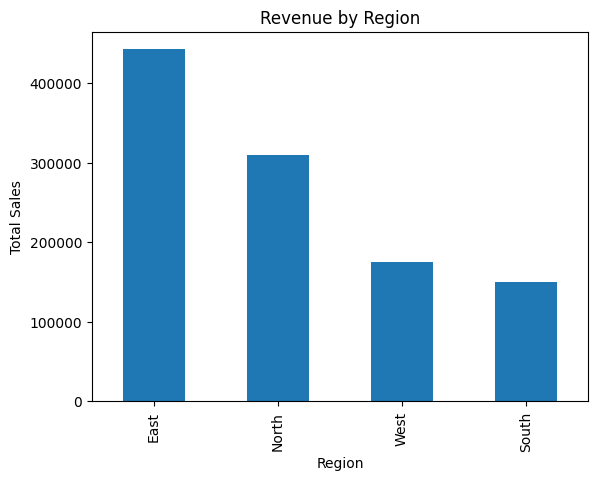

In [8]:
import matplotlib.pyplot as plt

revenue_by_region.plot(kind="bar", title="Revenue by Region")
plt.ylabel("Total Sales")
plt.show()


In [9]:
revenue_by_product = df.groupby("Product")["Total Sales"].sum().sort_values(ascending=False)
revenue_by_product


Product
Laptop        435000
Smartphone    388500
Tablet        252500
Name: Total Sales, dtype: int64

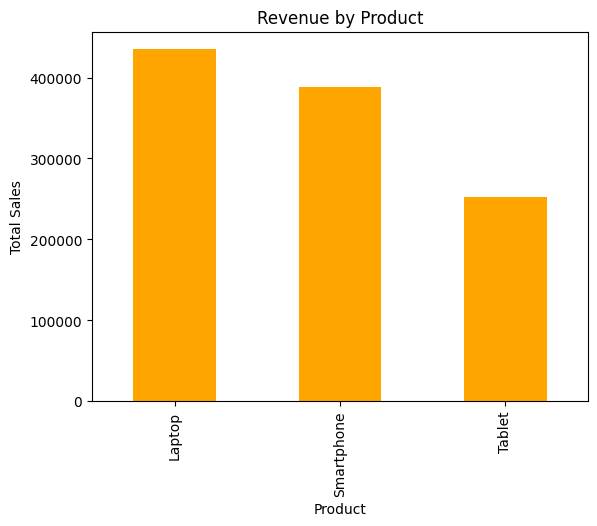

In [10]:
revenue_by_product.plot(kind="bar", title="Revenue by Product", color="orange")
plt.ylabel("Total Sales")
plt.show()


In [11]:
df["Date"] = pd.to_datetime(df["Date"])


In [12]:
monthly_revenue = df.groupby(df["Date"].dt.to_period("M"))["Total Sales"].sum()
monthly_revenue


Date
2023-01    120000
2023-02     42500
2023-03    147000
2023-04     60000
2023-05     70000
2023-06     52500
2023-07    200000
2023-08     45000
2023-09    119000
2023-10     55000
2023-11     95000
2023-12     70000
Freq: M, Name: Total Sales, dtype: int64

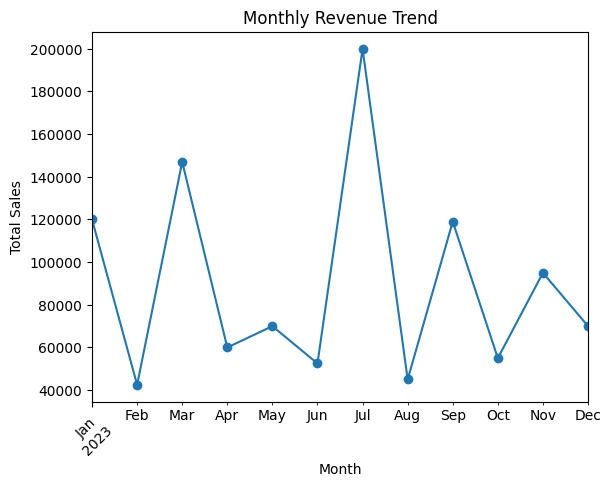

In [13]:
monthly_revenue.plot(kind="line", marker="o", title="Monthly Revenue Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()
